In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("data.csv")
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,notifications,pickups,productivity,mood,notes
0,2025-11-14,122,48,6,3,Normal school day
1,2025-11-15,135,52,5,3,More notifications from social apps
2,2025-11-16,98,37,7,4,Less screen time
3,2025-11-17,160,61,4,2,"Busy day, many alerts"
4,2025-11-18,110,40,6,3,Average day


In [3]:
df.describe(include='all')

,date,notifications,pickups,productivity,mood,notes
count,14,14.000000,14.000000,14.000000,14.000000,14
unique,NaN,NaN,NaN,NaN,NaN,14
top,NaN,NaN,NaN,NaN,NaN,Normal school day
freq,NaN,NaN,NaN,NaN,NaN,1
mean,2025-11-20 12:00:00,131.785714,50.928571,5.571429,3.000000,NaN
min,2025-11-14 00:00:00,90.000000,33.000000,3.000000,2.000000,NaN
25%,2025-11-17 06:00:00,106.250000,38.500000,4.250000,2.250000,NaN
50%,2025-11-20 12:00:00,132.500000,51.000000,5.500000,3.000000,NaN
75%,2025-11-23 18:00:00,152.500000,60.250000,6.750000,3.750000,NaN
max,2025-11-27 00:00:00,185.000000,75.000000,8.000000,4.000000,NaN


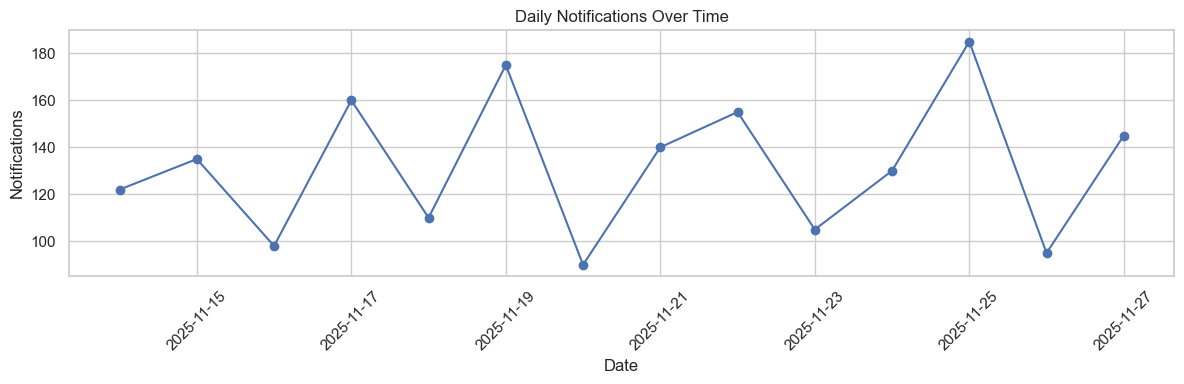

In [4]:
plt.figure(figsize=(12,4))
plt.plot(df['date'], df['notifications'], marker='o')
plt.title("Daily Notifications Over Time")
plt.xlabel("Date")
plt.ylabel("Notifications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

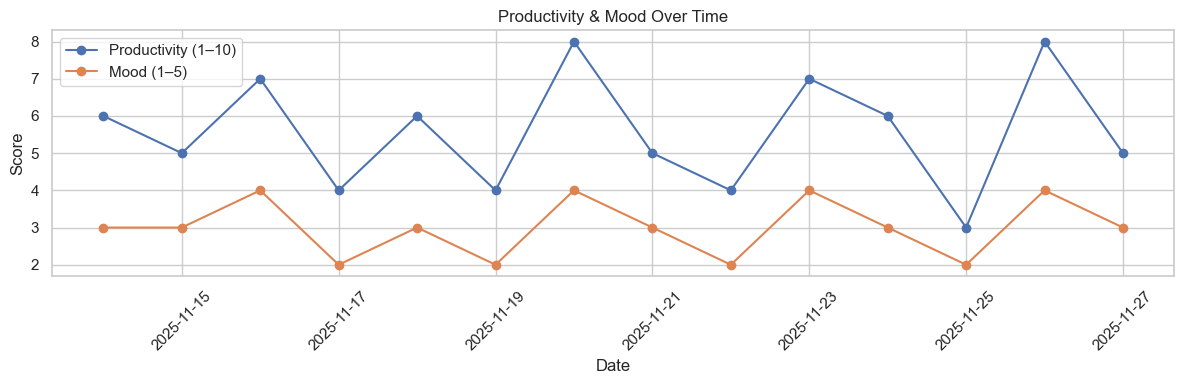

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df['date'], df['productivity'], marker='o', label="Productivity (1–10)")
plt.plot(df['date'], df['mood'], marker='o', label="Mood (1–5)")
plt.title("Productivity & Mood Over Time")
plt.xlabel("Date")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

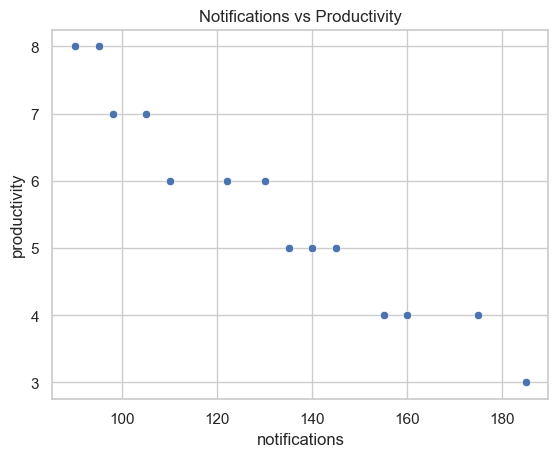

In [6]:
sns.scatterplot(data=df, x='notifications', y='productivity')
plt.title("Notifications vs Productivity")
plt.show()

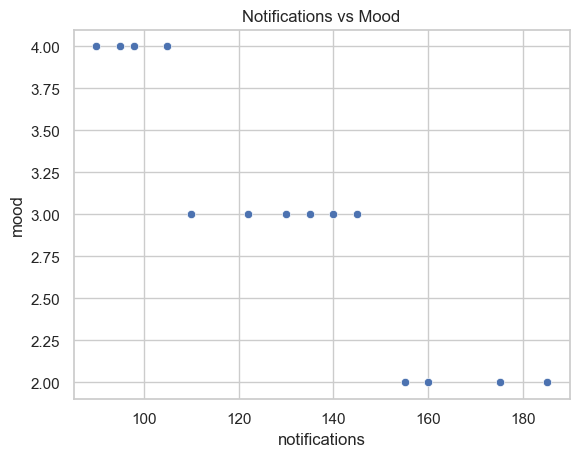

In [7]:
sns.scatterplot(data=df, x='notifications', y='mood')
plt.title("Notifications vs Mood")
plt.show()

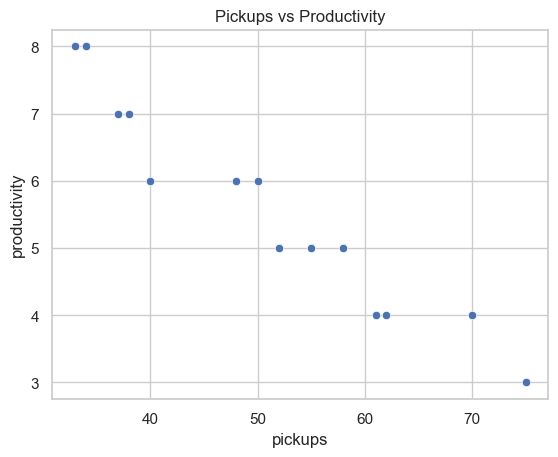

In [8]:
sns.scatterplot(data=df, x='pickups', y='productivity')
plt.title("Pickups vs Productivity")
plt.show()

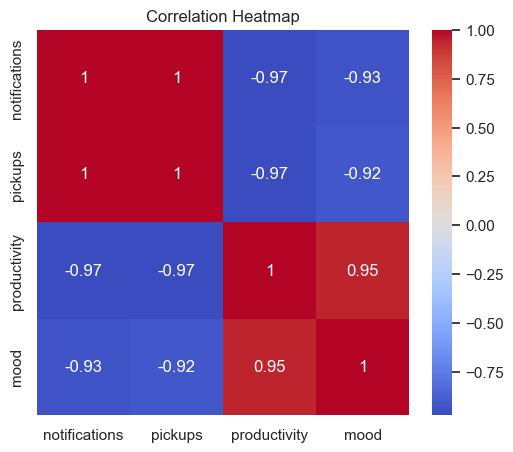

In [9]:
corr = df[['notifications','pickups','productivity','mood']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
pearson_prod = pearsonr(df['notifications'], df['productivity'])
pearson_mood = pearsonr(df['notifications'], df['mood'])
pearson_pickups = pearsonr(df['pickups'], df['productivity'])

pearson_prod, pearson_mood, pearson_pickups

(PearsonRResult(statistic=np.float64(-0.9701893679943084), pvalue=np.float64(9.501952254167993e-09)),
 PearsonRResult(statistic=np.float64(-0.9333796936736394), pvalue=np.float64(1.0922174302433655e-06)),
 PearsonRResult(statistic=np.float64(-0.9654727228651561), pvalue=np.float64(2.27046172667014e-08)))

In [11]:
spearman_prod = spearmanr(df['notifications'], df['productivity'])
spearman_mood = spearmanr(df['notifications'], df['mood'])
spearman_pickups = spearmanr(df['pickups'], df['productivity'])

spearman_prod, spearman_mood, spearman_pickups

(SignificanceResult(statistic=np.float64(-0.9844951849708405), pvalue=np.float64(1.9400734479517147e-10)),
 SignificanceResult(statistic=np.float64(-0.9376144618769908), pvalue=np.float64(7.433887811663147e-07)),
 SignificanceResult(statistic=np.float64(-0.9844951849708405), pvalue=np.float64(1.9400734479517147e-10)))

In [12]:
clean = df.dropna()

X = clean[['notifications']]
y = clean['productivity']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
ah = model.score(X, y)

slope, intercept, ah

(np.float64(-0.05003112591186834),
 np.float64(12.164816236242649),
 0.9412674097691957)

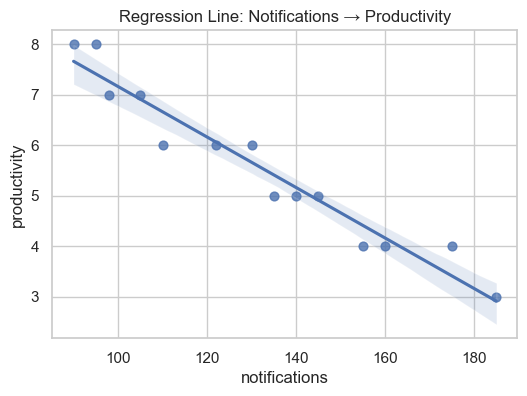

In [13]:
plt.figure(figsize=(6,4))
sns.regplot(x='notifications', y='productivity', data=clean, scatter_kws={"s":40})
plt.title("Regression Line: Notifications → Productivity")
plt.show()

### Interpretation

- If p < 0.05 → statistically significant result.
- A negative correlation coefficient means higher notifications relate to lower productivity.
- A high R² indicates that notifications explain a large portion of productivity variation.
- If the regression slope β₁ is negative, then productivity decreases as notifications increase.